In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
%matplotlib inline
import seaborn as sns


# LOADING THE TRAINING DATASETS

In [63]:
df_train=pd.read_csv(r"train.csv")
df_test=pd.read_csv(r"test.csv")

In [64]:
df_train.shape

(4209, 378)

In [65]:
df_test.shape

(4209, 377)

In [66]:
df_test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
df_test.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [68]:
df_train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [69]:
df_test.dtypes

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

In [70]:
df_train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [71]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [73]:
df_train.drop("ID",inplace=True,axis=1)
df_test.drop("ID",inplace=True,axis=1)

In [74]:
df_train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [75]:
zero_variance_columns=df_train.var()[df_train.var()==0].index.values

In [76]:
zero_variance_columns

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

Lets drop the zero variance columns

In [77]:
df_train.drop(zero_variance_columns, inplace=True, axis=1)
df_test.drop(zero_variance_columns, inplace=True, axis=1)

In [78]:
df_train.shape

(4209, 365)

Lets check if any columns has null or NaN values

In [79]:
np.sum(df_train.isnull().sum())

0

In [80]:
df_train.isnull().sum()

y       0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 365, dtype: int64

In [81]:
#That's good...nothing needs to be done

# Which columns are non numeric?

In [82]:
df_train.describe(include=['object'])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [83]:
objectColumns=df_train.describe(include=['object']).columns.values

In [84]:
objectColumns

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [85]:
#Lets label encode them|same as factoring the char in R, 
#we do this because ML model cant proces non numerical data 

In [86]:
encoder=LabelEncoder()

In [87]:
for col in objectColumns: 
    encoder.fit(df_train[col].append(df_test[col]).values)
    df_train[col] = encoder.transform(df_train[col])
    df_test[col] = encoder.transform(df_test[col])
    print("Unique classes for {} are:  {}\n".format(col,encoder.classes_ ))

Unique classes for X0 are:  ['a' 'aa' 'ab' 'ac' 'ad' 'ae' 'af' 'ag' 'ai' 'aj' 'ak' 'al' 'am' 'an' 'ao'
 'ap' 'aq' 'as' 'at' 'au' 'av' 'aw' 'ax' 'ay' 'az' 'b' 'ba' 'bb' 'bc' 'c'
 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u'
 'v' 'w' 'x' 'y' 'z']

Unique classes for X1 are:  ['a' 'aa' 'ab' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'w' 'y' 'z']

Unique classes for X2 are:  ['a' 'aa' 'ab' 'ac' 'ad' 'ae' 'af' 'ag' 'ah' 'ai' 'aj' 'ak' 'al' 'am' 'an'
 'ao' 'ap' 'aq' 'ar' 'as' 'at' 'au' 'av' 'aw' 'ax' 'ay' 'b' 'c' 'd' 'e'
 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'w' 'x'
 'y' 'z']

Unique classes for X3 are:  ['a' 'b' 'c' 'd' 'e' 'f' 'g']

Unique classes for X4 are:  ['a' 'b' 'c' 'd']

Unique classes for X5 are:  ['a' 'aa' 'ab' 'ac' 'ad' 'ae' 'af' 'ag' 'ah' 'b' 'c' 'd' 'f' 'g' 'h' 'i'
 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']

Unique classes for X6 are:  ['a' 'b' 'c' 'd' 'e'

In [88]:
df_train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,37,23,20,0,3,27,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,37,21,22,4,3,31,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,24,24,38,2,3,30,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,24,21,38,5,3,30,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,24,23,38,5,3,14,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#Now the data preprocessing is done

# We have too many columns, so lets try and pack the information in fewer columns

In [90]:
#we need atleat 98% information to be reatined, and accordingly have
#the extracted features of highest variance
pcamodel=PCA(0.98,svd_solver='full')
X=df_train.drop('y',axis=1)
y=df_train['y']
pcamodel.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [91]:
# these components are orthogonal to each other and are independent to each other
#these features are of highest variance and are itself calculating infogain
pcamodel.n_components_

12

In [92]:
#In 12 derived columns we are able to fit 98% of information..though we had 365 columns

In [93]:
pcamodel.explained_variance_ratio_

array([0.40868988, 0.21758508, 0.13120081, 0.10783522, 0.08165248,
       0.0140934 , 0.00660951, 0.00384659, 0.00260289, 0.00214378,
       0.00209857, 0.00180388])

In [94]:
#in the above data, we can see 0.40 says it has 40 % of information and so on

In [95]:
#Divide the training data between training and validation
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [96]:
compactedDerivedFeatures_train=pd.DataFrame(pcamodel.transform(X_train))

In [97]:
compactedDerivedFeatures_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000
mean,-0.026799,-0.211816,0.029763,-0.065402,-0.063075,0.015586,-0.007407,-0.006182,0.000833,0.009954,0.000478,-0.002169
std,15.648904,11.364890,8.933146,8.056159,7.043068,2.896704,1.995723,1.528100,1.261684,1.143447,1.124331,1.030432
min,-23.071496,-22.697173,-17.883045,-19.616685,-13.583307,-5.040693,-4.377823,-3.289078,-3.196062,-2.844281,-3.058761,-2.234745
25%,-13.331227,-7.660939,-8.274029,-6.497304,-5.920797,-2.130067,-1.941183,-1.503764,-0.993944,-0.634118,-0.775005,-0.624894
50%,-4.380650,-2.516139,0.897065,-1.182782,-0.603521,-0.205659,0.408907,0.405359,-0.028099,-0.053136,-0.046273,-0.102529
75%,12.427669,6.220204,7.167600,6.542448,5.957571,1.240799,1.497018,1.179973,0.808253,0.521783,0.729930,0.442617
max,39.025839,32.845313,18.839900,20.409804,14.308816,7.519440,4.685064,3.447685,3.612572,5.094022,3.547067,4.431119


In [98]:
compactedDerivedFeatures_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.419452,-0.611007,-3.843534,15.051223,10.517966,-3.291361,2.242806,-1.391341,-1.641953,-0.781943,-0.670463,0.249792
1,-3.754406,-0.156986,-6.634242,12.931294,5.700700,0.689493,0.326794,-0.910293,-0.805958,1.301613,0.272010,1.246175
2,4.723647,15.727164,10.172595,-12.071983,-6.283282,-0.600279,0.773690,0.710189,-2.106015,-2.510619,-0.689292,-0.937849
3,-0.926505,11.287117,-3.012766,-10.112258,-6.317545,-0.661537,-0.239300,0.559985,-1.189790,2.587546,-0.680997,0.724748
4,10.395983,-3.471925,-11.784807,-0.533004,-0.975479,-4.639907,1.411170,-0.739972,3.299822,0.739134,-0.783735,-0.130903


In [99]:
# Lets check the correlation between extracted features and output var

In [100]:
compactedDerivedFeaturesAndTarget_train=compactedDerivedFeatures_train
compactedDerivedFeaturesAndTarget_train['y']=y_train

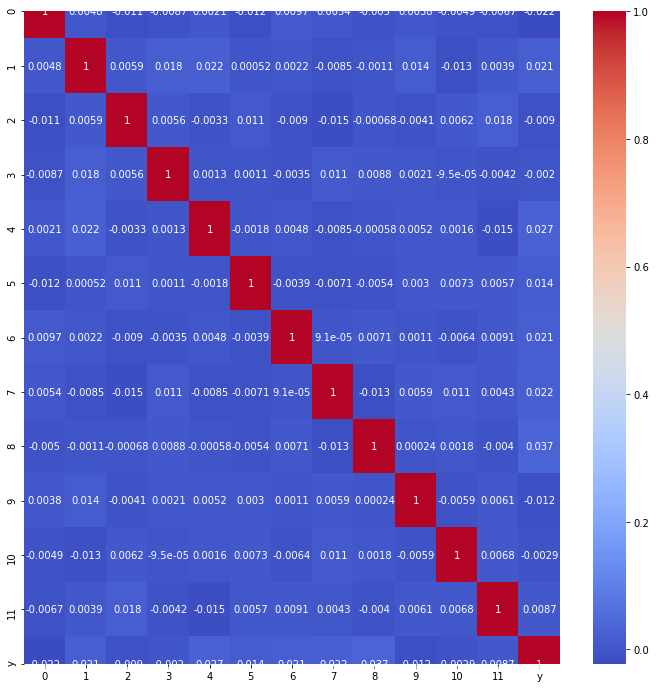

In [101]:
plt.figure(figsize=(12,12))
corrMap=compactedDerivedFeaturesAndTarget_train.corr()
sns.heatmap(corrMap,annot=True,cmap='coolwarm')

In [102]:
compactedDerivedFeatures_val = pd.DataFrame(pcamodel.transform(X_val))
compactedDerivedFeatures_test = pd.DataFrame(pcamodel.transform(df_test))

In [103]:
compactedDerivedFeatures_val


,0,1,2,3,4,5,6,7,8,9,10,11
0,20.612140,-16.319893,-7.939029,2.691741,-0.674573,-2.747793,-2.127039,2.941831,1.305954,-0.095223,2.018229,-1.100170
1,-1.123824,-16.036199,0.415082,2.916770,9.355356,-1.364116,-1.878937,1.862838,-1.381127,-0.221185,-1.173805,-1.616512
2,-2.749224,4.808027,2.000871,-10.738490,3.243479,-3.692114,-0.056620,-0.294929,-1.078660,0.316824,0.755149,0.619547
3,14.199442,3.150340,3.270692,10.577979,-0.734433,-2.593174,1.135354,1.247012,0.809166,-0.595677,-0.603789,4.048736
4,23.355595,-15.268156,5.729429,5.951943,4.790395,-1.792474,0.231251,0.651460,-0.068891,-0.218094,0.152707,-1.589765
...,...,...,...,...,...,...,...,...,...,...,...,...
837,-12.702669,19.891930,-6.001308,-3.784697,2.403210,4.510144,1.121552,-0.027753,0.852773,-0.758725,-0.661310,-1.200741
838,-9.475260,18.149236,12.168198,-9.639324,11.277108,-1.476472,0.884837,1.099494,-0.202077,-1.778138,0.242657,-1.791338
839,-17.944041,8.607653,-9.346593,-3.419816,6.829281,0.506923,-0.082796,-0.175111,-0.994451,0.131447,0.515479,0.645915
840,1.186011,-15.753999,11.508313,8.828140,-1.383177,0.163606,2.650603,0.864410,-1.211257,-1.432974,-0.346209,-0.081356


In [104]:
compactedDerivedFeatures_train

,0,1,2,3,4,5,6,7,8,9,10,11,y
0,-2.419452,-0.611007,-3.843534,15.051223,10.517966,-3.291361,2.242806,-1.391341,-1.641953,-0.781943,-0.670463,0.249792,130.81
1,-3.754406,-0.156986,-6.634242,12.931294,5.700700,0.689493,0.326794,-0.910293,-0.805958,1.301613,0.272010,1.246175,88.53
2,4.723647,15.727164,10.172595,-12.071983,-6.283282,-0.600279,0.773690,0.710189,-2.106015,-2.510619,-0.689292,-0.937849,76.26
3,-0.926505,11.287117,-3.012766,-10.112258,-6.317545,-0.661537,-0.239300,0.559985,-1.189790,2.587546,-0.680997,0.724748,80.62
4,10.395983,-3.471925,-11.784807,-0.533004,-0.975479,-4.639907,1.411170,-0.739972,3.299822,0.739134,-0.783735,-0.130903,78.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,-2.347723,-1.290701,8.343259,-3.238105,5.252336,-4.444889,1.539155,-1.945461,2.149679,0.170514,-1.249758,-0.640747,87.85
3363,14.998405,6.241171,-0.571118,11.500606,-2.515762,-2.548913,0.856422,0.674280,1.068246,-1.643639,-0.688946,3.266046,NaN
3364,-16.415233,-10.734672,11.499726,12.948982,-11.896522,-2.130543,0.981542,1.621301,1.858401,1.066422,0.879612,0.406846,91.46
3365,-16.057694,-5.014249,14.981020,6.639199,-12.324817,-1.734501,-1.966853,0.751376,1.483096,0.279720,-0.188072,-0.566702,NaN


In [105]:
#Lets use the Xgboost
#Xgboost is used when we want incrementally strenghthen the model by using 

In [106]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
regressor=xgb.XGBRegressor(objective='reg:linear',learning_rate=0.1)

In [107]:
compactedDerivedFeatures_train.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'y'], dtype='object')

In [108]:
compactedDerivedFeatures_train.drop(columns=['y'],inplace=True,axis=1)

In [109]:
compactedDerivedFeatures_train.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='object')

In [110]:
compactedDerivedFeatures_train.shape

(3367, 12)

In [111]:
compactedDerivedFeatures_train.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='object')

In [112]:
compactedDerivedFeatures_train.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
dtype: object

In [113]:
regressor.fit(compactedDerivedFeatures_train,y_train)

[22:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [114]:
compactedDerivedFeatures_val.shape

(842, 12)

In [115]:
compactedDerivedFeatures_val.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
dtype: object

In [116]:
predictions_val = regressor.predict(compactedDerivedFeatures_val)

ValueError: feature_names mismatch: ['0 ', '1 ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 ', '10', '11'] ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
expected 1 , 9 , 3 , 8 , 4 , 7 , 0 , 5 , 2 , 6  in input data
training data did not have the following fields: 1, 6, 5, 2, 7, 8, 3, 9, 4, 0

In [ ]:
mse_score = mean_squared_error(y_val, predictions_val)'
print("MSE is:",mse_score)

In [ ]:
from sklearn.metrics import r2_score
print("R2 score is : ",r2_score(y_val, predictions_val) )